# QTW Case Study - 10 : Using Statistics to Identify Spam

Author : Rajeev Kumar  
Section: MSDS 7333 Quantifying the World - 401

 # Table of Contents
<div class="toc" style="margin-top: 1em;"><ul class="toc-item" id="toc-level0"><li><span><a href="http://localhost:8888/notebooks/Documents/Notebooks/DataMiningNotebooks/RKumar_week10casestudy.ipynb#QTW-Case-Study---10-:-Using-Statistics-to-Identify-Spam" data-toc-modified-id="QTW-Case-Study---10-:-Using-Statistics-to-Identify-Spam-1">QTW Case Study - 10 : Using Statistics to Identify Spam</a></span><ul class="toc-item"><li><span><a href="http://localhost:8888/notebooks/Documents/Notebooks/DataMiningNotebooks/RKumar_week10casestudy.ipynb#1.-Abstract" data-toc-modified-id="1.-Abstract-1.1">1. Abstract</a></span></li><li><span><a href="http://localhost:8888/notebooks/Documents/Notebooks/DataMiningNotebooks/RKumar_week10casestudy.ipynb#2.-Introduction" data-toc-modified-id="2.-Introduction-1.2">2. Introduction</a></span></li><li><span><a href="http://localhost:8888/notebooks/Documents/Notebooks/DataMiningNotebooks/RKumar_week10casestudy.ipynb#3.-Method" data-toc-modified-id="3.-Method-1.3">3. Method</a></span></li><li><span><a href="http://localhost:8888/notebooks/Documents/Notebooks/DataMiningNotebooks/RKumar_week10casestudy.ipynb#4.-DataSet-Description" data-toc-modified-id="4.-DataSet-Description-1.4">4. DataSet Description</a></span></li><li><span><a href="http://localhost:8888/notebooks/Documents/Notebooks/DataMiningNotebooks/RKumar_week10casestudy.ipynb#5.-Data-Cleansing-and-Exploratory-Data-Analysis" data-toc-modified-id="5.-Data-Cleansing-and-Exploratory-Data-Analysis-1.5">5. Data Cleansing and Exploratory Data Analysis</a></span><ul class="toc-item"><li><span><a href="http://localhost:8888/notebooks/Documents/Notebooks/DataMiningNotebooks/RKumar_week10casestudy.ipynb#5.1-Reading-Messages" data-toc-modified-id="5.1-Reading-Messages-1.5.1">5.1 Reading Messages</a></span></li><li><span><a href="http://localhost:8888/notebooks/Documents/Notebooks/DataMiningNotebooks/RKumar_week10casestudy.ipynb#5.2-Processing-the-Header" data-toc-modified-id="5.2-Processing-the-Header-1.5.2">5.2 Processing the Header</a></span></li><li><span><a href="http://localhost:8888/notebooks/Documents/Notebooks/DataMiningNotebooks/RKumar_week10casestudy.ipynb#5.3-Processing-Attachment" data-toc-modified-id="5.3-Processing-Attachment-1.5.3">5.3 Processing Attachment</a></span></li><li><span><a href="http://localhost:8888/notebooks/Documents/Notebooks/DataMiningNotebooks/RKumar_week10casestudy.ipynb#5.4-Deriving-Variables-from-the-email-Message" data-toc-modified-id="5.4-Deriving-Variables-from-the-email-Message-1.5.4">5.4 Deriving Variables from the email Message</a></span></li><li><span><a href="http://localhost:8888/notebooks/Documents/Notebooks/DataMiningNotebooks/RKumar_week10casestudy.ipynb#5.5-Exploring-the-email-Feature-Set." data-toc-modified-id="5.5-Exploring-the-email-Feature-Set.-1.5.5">5.5 Exploring the email Feature Set.</a></span></li><li><span><a href="http://localhost:8888/notebooks/Documents/Notebooks/DataMiningNotebooks/RKumar_week10casestudy.ipynb#5.6-Fitting-the-rpart()-Model-to-the-email-Data" data-toc-modified-id="5.6-Fitting-the-rpart()-Model-to-the-email-Data-1.5.6">5.6 Fitting the rpart() Model to the email Data</a></span></li><li><span><a href="http://localhost:8888/notebooks/Documents/Notebooks/DataMiningNotebooks/RKumar_week10casestudy.ipynb#5.7-Model-Parameters-Tuning" data-toc-modified-id="5.7-Model-Parameters-Tuning-1.5.7">5.7 Model Parameters Tuning</a></span><ul class="toc-item"><li><span><a href="http://localhost:8888/notebooks/Documents/Notebooks/DataMiningNotebooks/RKumar_week10casestudy.ipynb#5.7.1-Finding-Optimal-Value-of-Complexity-Parameter-&quot;cp&quot;" data-toc-modified-id="5.7.1-Finding-Optimal-Value-of-Complexity-Parameter-&quot;cp&quot;-1.5.7.1">5.7.1 Finding Optimal Value of Complexity Parameter "cp"</a></span></li><li><span><a href="http://localhost:8888/notebooks/Documents/Notebooks/DataMiningNotebooks/RKumar_week10casestudy.ipynb#5.7.2-Finding-Optimal-Value-of-Complexity-Parameter-&quot;minsplit&quot;" data-toc-modified-id="5.7.2-Finding-Optimal-Value-of-Complexity-Parameter-&quot;minsplit&quot;-1.5.7.2">5.7.2 Finding Optimal Value of Complexity Parameter "minsplit"</a></span></li></ul></li></ul></li><li><span><a href="http://localhost:8888/notebooks/Documents/Notebooks/DataMiningNotebooks/RKumar_week10casestudy.ipynb#6.-Conclusion-and-Future-Work" data-toc-modified-id="6.-Conclusion-and-Future-Work-1.6">6. Conclusion and Future Work</a></span></li><li><span><a href="http://localhost:8888/notebooks/Documents/Notebooks/DataMiningNotebooks/RKumar_week10casestudy.ipynb#7.-References" data-toc-modified-id="7.-References-1.7">7. References</a></span></li></ul></li></ul></div>

## 1. Abstract  
This case study classifies email messages into Spam and Ham categories based on the characteristics of email's subject and body content. Various features are defined and derived from email messages before running the recursive partitioning of classifications on all emails. Some examples of derived features are "If subject contains Re", "Number of Exclamations mark on the subject", "no of the capital letters in the body", "no of characters in the body". 

Upon running the RPART algorithm on the train data, we have found that "no of the capital letters in the body" to be the most significant classifier. It is followed by "no of body characters" and "percentage of characters in HTML tags". Also, "RPART" model parameters were tuned to find the optimal values where Type-1 and Type-2 errors are minimized. 


## 2. Introduction
The objective of this case study is to read over 9000 email messages from SpamAssassin website and classify them into Spam and Ham groups. The hand labeled email messages from this website have been randomly split into train and test data. And, recursive partitioning of a classification model is run on the training dataset to create a decision tree. 

RPART model with default parameters has Type -I error of 5% and Type-II error of 16%. Upon model parameters tuning Type-I and Type -II error further reduced to 3% and 13% respectively. <b>(Q.19)</b>

## 3. Method
We have used RPART library in R and readLines(), read.dcf() methods to extract the data from the SpasmAssassin website. Also, apply functions such as tapply, mapply, and lapply() functions to compare and analyze the datasets. We have used log liklihood metric to classify messages into ham or spam. recover() function is used for browsing active function calls after an error. boxplot() method is used for plotting box plots. qqplot() method is used for plotting QQ-plots.

## 4. DataSet Description

We have 5 Folders namely easy_ham, easy_ham_2, hard_ham, spam and spam_2 in SpasmAssassin datasets. Each email is a file in these directories.  An electronic mail message has two parts, a header, and body.  Emails have following information

Date: Date Email was sent
From: Email Address of Sender
To: Email Address of receiver
Subject: Subject of Email Address
Message-Id: Unique Identifier of message
Content-Type: Plain/text or multipart(Email attachment)
Status: Status of Email Message
Email Body: Body of Email


## 5. Data Cleansing and Exploratory Data Analysis

### 5.1 Reading Messages

In [1]:
# Set Path where Email File's Folders are present
spamPath="/Users/rajeevkumar/Downloads/Spam"

In [2]:
# List Directories in Spam Root Path
list.dirs(spamPath, full.names = FALSE)

[1] ""           "easy_ham"   "easy_ham_2" "hard_ham"   "spam"      
[6] "spam_2"

In [3]:
#List Directories with out Root Directory
list.files(path = spamPath)

[1] "easy_ham"   "easy_ham_2" "hard_ham"   "spam"       "spam_2"

In [4]:
# List Spam_2 Emails
head(list.files(path = paste(spamPath, "/spam_2", sep = .Platform$file.sep)))

[1] "00001.317e78fa8ee2f54cd4890fdc09ba8176"
[2] "00002.9438920e9a55591b18e60d1ed37d992b"
[3] "00003.590eff932f8704d8b0fcbe69d023b54d"
[4] "00004.bdcc075fa4beb5157b5dd6cd41d8887b"
[5] "00005.ed0aba4d386c5e62bc737cf3f0ed9589"
[6] "00006.3ca1f399ccda5d897fecb8c57669a283"

In [5]:
# List Ham Email Files
head(list.files(path = paste(spamPath, "/easy_ham", sep = .Platform$file.sep)))


[1] "00001.7c53336b37003a9286aba55d2945844c"
[2] "00002.9c4069e25e1ef370c078db7ee85ff9ac"
[3] "00003.860e3c3cee1b42ead714c5c874fe25f7"
[4] "00004.864220c5b6930b209cc287c361c99af1"
[5] "00005.bf27cdeaf0b8c4647ecd61b1d09da613"
[6] "00006.253ea2f9a9cc36fa0b1129b04b806608"

In [6]:
dirNames = list.files(path = paste(spamPath,
                      sep = .Platform$file.sep))

# Total No of Emails
length(list.files(paste(spamPath,  dirNames,
                        sep = .Platform$file.sep)))

[1] 9353

In [7]:
# Total No of Emails in each directory
sapply(paste(spamPath, dirNames,
             sep = .Platform$file.sep),
       function(dir) length(list.files(dir)) )

/Users/rajeevkumar/Downloads/Spam/easy_ham 
                                        5052 
/Users/rajeevkumar/Downloads/Spam/easy_ham_2 
                                        1401 
  /Users/rajeevkumar/Downloads/Spam/hard_ham 
                                         501 
      /Users/rajeevkumar/Downloads/Spam/spam 
                                        1001 
    /Users/rajeevkumar/Downloads/Spam/spam_2 
                                        1398

In [8]:
fullDirNames = paste(spamPath, dirNames,
                     sep = .Platform$file.sep)
#All Emails in fileNames 
fileNames = list.files(fullDirNames[1], full.names = TRUE)

#Sample Email File
fileNames[1]

[1] "/Users/rajeevkumar/Downloads/Spam/easy_ham/00001.7c53336b37003a9286aba55d2945844c"

In [9]:
# Sample Message Content
msg = readLines(fileNames[1])
head(msg)

[1] "From exmh-workers-admin@redhat.com  Thu Aug 22 12:36:23 2002"      
[2] "Return-Path: <exmh-workers-admin@spamassassin.taint.org>"          
[3] "Delivered-To: zzzz@localhost.netnoteinc.com"                       
[4] "Received: from localhost (localhost [127.0.0.1])"                  
[5] "\tby phobos.labs.netnoteinc.com (Postfix) with ESMTP id D03E543C36"
[6] "\tfor <zzzz@localhost>; Thu, 22 Aug 2002 07:36:16 -0400 (EDT)"

In [10]:
# Select 15 Sample Messages 
indx = c(1:5, 15, 27, 68, 69, 329, 404, 427, 516, 852, 971)
fn = list.files(fullDirNames[1], full.names = TRUE)[indx]

# Read 15 Sample Messages
sampleEmail = sapply(fn, readLines)

In [11]:
# Display Content of Sample Email Message
msg = sampleEmail[[1]]
msg

[1] "From exmh-workers-admin@redhat.com  Thu Aug 22 12:36:23 2002"                                                        
  [2] "Return-Path: <exmh-workers-admin@spamassassin.taint.org>"                                                            
  [3] "Delivered-To: zzzz@localhost.netnoteinc.com"                                                                         
  [4] "Received: from localhost (localhost [127.0.0.1])"                                                                    
  [5] "\tby phobos.labs.netnoteinc.com (Postfix) with ESMTP id D03E543C36"                                                  
  [6] "\tfor <zzzz@localhost>; Thu, 22 Aug 2002 07:36:16 -0400 (EDT)"                                                       
  [7] "Received: from phobos [127.0.0.1]"                                                                                   
  [8] "\tby localhost with IMAP (fetchmail-5.9.0)"                                                                          
  [9] "\tfor zzzz@localhost (single-drop); Thu, 22 Aug 2002 12:36:16 +0100 (IST)"                                           
 [10] "Received: from listman.spamassassin.taint.org (listman.spamassassin.taint.org [66.187.233.211]) by"                  
 [11] "    dogma.slashnull.org (8.11.6/8.11.6) with ESMTP id g7MBYrZ04811 for"                                              
 [12] "    <zzzz-exmh@spamassassin.taint.org>; Thu, 22 Aug 2002 12:34:53 +0100"                                             
 [13] "Received: from listman.spamassassin.taint.org (localhost.localdomain [127.0.0.1]) by"                                
 [14] "    listman.redhat.com (Postfix) with ESMTP id 8386540858; Thu, 22 Aug 2002"                                         
 [15] "    07:35:02 -0400 (EDT)"                                                                                            
 [16] "Delivered-To: exmh-workers@listman.spamassassin.taint.org"                                                           
 [17] "Received: from int-mx1.corp.spamassassin.taint.org (int-mx1.corp.spamassassin.taint.org"                             
 [18] "    [172.16.52.254]) by listman.redhat.com (Postfix) with ESMTP id 10CF8406D7"                                       
 [19] "    for <exmh-workers@listman.redhat.com>; Thu, 22 Aug 2002 07:34:10 -0400"                                          
 [20] "    (EDT)"                                                                                                           
 [21] "Received: (from mail@localhost) by int-mx1.corp.spamassassin.taint.org (8.11.6/8.11.6)"                              
 [22] "    id g7MBY7g11259 for exmh-workers@listman.redhat.com; Thu, 22 Aug 2002"                                           
 [23] "    07:34:07 -0400"                                                                                                  
 [24] "Received: from mx1.spamassassin.taint.org (mx1.spamassassin.taint.org [172.16.48.31]) by"                            
 [25] "    int-mx1.corp.redhat.com (8.11.6/8.11.6) with SMTP id g7MBY7Y11255 for"                                           
 [26] "    <exmh-workers@redhat.com>; Thu, 22 Aug 2002 07:34:07 -0400"                                                      
 [27] "Received: from ratree.psu.ac.th ([202.28.97.6]) by mx1.spamassassin.taint.org"                                       
 [28] "    (8.11.6/8.11.6) with SMTP id g7MBIhl25223 for <exmh-workers@redhat.com>;"                                        
 [29] "    Thu, 22 Aug 2002 07:18:55 -0400"                                                                                 
 [30] "Received: from delta.cs.mu.OZ.AU (delta.coe.psu.ac.th [172.30.0.98]) by"                                             
 [31] "    ratree.psu.ac.th (8.11.6/8.11.6) with ESMTP id g7MBWel29762;"                                                    
 [32] "    Thu, 22 Aug 2002 18:32:40 +0700 (ICT)"                                                                           
 [

In [12]:
# Function to Split Message in Header and Body
splitMessage = function(msg) {
  splitPoint = match("", msg)
  header = msg[1:(splitPoint-1)]
  body = msg[ -(1:splitPoint) ]
  return(list(header = header, body = body))
}

In [13]:
# Split Header and Body of Sample email Message
sampleSplit = lapply(sampleEmail, splitMessage)

In [14]:
# Function to get Boundaries

getBoundary = function(header) {
  boundaryIdx = grep("boundary=", header)
  boundary = gsub('"', "", header[boundaryIdx])
  gsub(".*boundary= *([^;]*);?.*", "\\1", boundary)
}

### 5.2 Processing the Header

In [15]:
# Let us inspect one Header Message
header = sampleSplit[[1]]$header
header[1:12]

[1] "From exmh-workers-admin@redhat.com  Thu Aug 22 12:36:23 2002"                                      
 [2] "Return-Path: <exmh-workers-admin@spamassassin.taint.org>"                                          
 [3] "Delivered-To: zzzz@localhost.netnoteinc.com"                                                       
 [4] "Received: from localhost (localhost [127.0.0.1])"                                                  
 [5] "\tby phobos.labs.netnoteinc.com (Postfix) with ESMTP id D03E543C36"                                
 [6] "\tfor <zzzz@localhost>; Thu, 22 Aug 2002 07:36:16 -0400 (EDT)"                                     
 [7] "Received: from phobos [127.0.0.1]"                                                                 
 [8] "\tby localhost with IMAP (fetchmail-5.9.0)"                                                        
 [9] "\tfor zzzz@localhost (single-drop); Thu, 22 Aug 2002 12:36:16 +0100 (IST)"                         
[10] "Received: from listman.spamassassin.taint.org (listman.spamassassin.taint.org [66.187.233.211]) by"
[11] "    dogma.slashnull.org (8.11.6/8.11.6) with ESMTP id g7MBYrZ04811 for"                            
[12] "    <zzzz-exmh@spamassassin.taint.org>; Thu, 22 Aug 2002 12:34:53 +0100"

In [16]:
# Substitute From to "Top-From:" In order to make header in key-value format
header[1] = sub("^From", "Top-From:", header[1])
header[1]

[1] "Top-From: exmh-workers-admin@redhat.com  Thu Aug 22 12:36:23 2002"

In [17]:
# Read the header data using read.dcf function.
headerPieces = read.dcf(textConnection(header), all = TRUE)
# headerPieces DataFrame 
# Let's look at column Delivered-To
headerPieces[, "Delivered-To"]

[[1]]
[1] "zzzz@localhost.netnoteinc.com"              
[2] "exmh-workers@listman.spamassassin.taint.org"

In [18]:
# Convert HeaderPieces into a Character Vector
headerVec = unlist(headerPieces)

# Length of Keys
dupKeys = sapply(headerPieces, function(x) length(unlist(x)))

# Assign Names of Keys
names(headerVec) = rep(colnames(headerPieces), dupKeys)
    


In [19]:
# No of elements in Delivered-To
headerVec[ which(names(headerVec) == "Delivered-To") ]

Delivered-To 
              "zzzz@localhost.netnoteinc.com" 
                                 Delivered-To 
"exmh-workers@listman.spamassassin.taint.org"

In [20]:
# No of Rows in headervec
length(headerVec)

[1] 36

In [21]:
# No of Unique Names in headervec
length(unique(names(headerVec)))

[1] 26

In [22]:
# Let's put the above steps in Process Header Function
processHeader = function(header)
{
       # modify the first line to create a key:value pair
  header[1] = sub("^From", "Top-From:", header[1])
    
  if(length(showConnections(all = FALSE))>0) closeAllConnections()
    
  headerMat = read.dcf(textConnection(header), all = TRUE)
  headerVec = unlist(headerMat)
  
  dupKeys = sapply(headerMat, function(x) length(unlist(x)))
  names(headerVec) = rep(colnames(headerMat), dupKeys)
  
  return(headerVec)
}

In [23]:
# Let's process processHeader Function on all sample messages
headerList = lapply(sampleSplit, 
                    function(msg) {
                      processHeader(msg$header)} )

In [24]:
# Let us inspect Content Type of all 15 Messages in sampleSplit
contentTypes = sapply(headerList, function(header) 
                                        header["Content-Type"])
names(contentTypes) = NULL
contentTypes

[1] "text/plain; charset=us-ascii"                                                                                   
 [2] "text/plain; charset=US-ASCII"                                                                                   
 [3] "text/plain; charset=US-ASCII"                                                                                   
 [4] "text/plain; charset=\"us-ascii\""                                                                               
 [5] "text/plain; charset=US-ASCII"                                                                                   
 [6] "multipart/signed;\nboundary=\"==_Exmh_-1317289252P\";\nmicalg=pgp-sha1;\nprotocol=\"application/pgp-signature\""
 [7] NA                                                                                                               
 [8] "multipart/alternative;\nboundary=\"----=_NextPart_000_00C1_01C25017.F2F04E20\""                                 
 [9] "multipart/alternative; boundary=Apple-Mail-2-874629474"                                                         
[10] "multipart/signed;\nboundary=\"==_Exmh_-518574644P\";\nmicalg=pgp-sha1;\nprotocol=\"application/pgp-signature\"" 
[11] "multipart/related;\nboundary=\"------------090602010909000705010009\""                                          
[12] "multipart/signed;\nboundary=\"==_Exmh_-451422450P\";\nmicalg=pgp-sha1;\nprotocol=\"application/pgp-signature\"" 
[13] "multipart/signed;\nboundary=\"==_Exmh_267413022P\";\nmicalg=pgp-sha1;\nprotocol=\"application/pgp-signature\""  
[14] "multipart/mixed;\nboundary=\"----=_NextPart_000_0005_01C26412.7545C1D0\""                                       
[15] "multipart/alternative;\nboundary=\"------------080209060700030309080805\""

7th Message returned "NA"

### 5.3 Processing Attachment

In [25]:
# Messages which has attachments
hasAttach = grep("^ *multi", tolower(contentTypes))
hasAttach

[1]  6  8  9 10 11 12 13 14 15

In [26]:
# Display Boundaries for messages that has attachment
boundaries = getBoundary(contentTypes[ hasAttach ])
boundaries

[1] "==_Exmh_-1317289252P"                     
[2] "----=_NextPart_000_00C1_01C25017.F2F04E20"
[3] "Apple-Mail-2-874629474"                   
[4] "==_Exmh_-518574644P"                      
[5] "------------090602010909000705010009"     
[6] "==_Exmh_-451422450P"                      
[7] "==_Exmh_267413022P"                       
[8] "----=_NextPart_000_0005_01C26412.7545C1D0"
[9] "------------080209060700030309080805"

In [27]:
# Let's inspect 9th boundary
boundary = boundaries[9]
body = sampleSplit[[15]]$body

In [28]:
# Locate Attachment by searching the boundary string preceeded by two hyphens in the body.
bString = paste("--", boundary, sep = "")
bStringLocs = which(bString == body)
bStringLocs

[1]  2 35

The lines (2,35) mark the start of the body and the start of attachment.

In [29]:
# Locate End of the Boundaries
eString = paste("--", boundary, "--", sep = "")
eStringLoc = which(eString == body)
eStringLoc

[1] 77

In [30]:
# No of lines in the Attachment
diff(c(bStringLocs[-1], eStringLoc))

[1] 42

In [31]:
# Define Function to process Attachment
processAttach = function(body, contentType){
  
  boundary = getBoundary(contentType)
  
  bString = paste("--", boundary, "$", sep = "")
  bStringLocs = grep(bString, body)
  
  eString = paste("--", boundary, "--$", sep = "")
  eStringLoc = grep(eString, body)
  
  n = length(body)
  
  if (length(eStringLoc) == 0) eStringLoc = n + 1
  if (length(bStringLocs) == 1) attachLocs = NULL
  else attachLocs = c(bStringLocs[-1],  eStringLoc)
  
  msg = body[ (bStringLocs[1] + 1) : min(n, (bStringLocs[2] - 1), 
                                         na.rm = TRUE)]
  
  if ( eStringLoc < n )
    msg = c(msg, body[ (eStringLoc + 1) : n ])
  
  if ( !is.null(attachLocs) ) {
    attachLens = diff(attachLocs, lag = 1) 
    attachTypes = mapply(function(begL, endL) {
      contentTypeLoc = grep("[Cc]ontent-[Tt]ype", body[ (begL + 1) : (endL - 1)])
      contentType = body[ begL + contentTypeLoc]
      contentType = gsub('"', "", contentType )
      MIMEType = sub(" *Content-Type: *([^;]*);?.*", "\\1", contentType)
      return(MIMEType)
    }, attachLocs[-length(attachLocs)], attachLocs[-1])
  }
  
  if (is.null(attachLocs)) return(list(body = msg, attachInfo = NULL) )
  else return(list(body = msg, 
                   attachDF = data.frame(aLen = attachLens, 
                                         aType = attachTypes,
                                         stringsAsFactors = FALSE)))                                
}

In [32]:
bodyList = lapply(sampleSplit, function(msg) msg$body)
attList = mapply(processAttach, bodyList[hasAttach], 
                 contentTypes[hasAttach], 
                 SIMPLIFY = FALSE)

Warning message in grep(bString, body):
“input string 41 is invalid in this locale”Warning message in grep(bString, body):
“input string 43 is invalid in this locale”Warning message in grep(bString, body):
“input string 51 is invalid in this locale”Warning message in grep(eString, body):
“input string 41 is invalid in this locale”Warning message in grep(eString, body):
“input string 43 is invalid in this locale”Warning message in grep(eString, body):
“input string 51 is invalid in this locale”

In [33]:
# Examine Attachment lengths
lens = sapply(attList, function(processedA)
                           processedA$attachDF$aLen)
head(lens)

$`/Users/rajeevkumar/Downloads/Spam/easy_ham/00014.cb20e10b2bfcb8210a1c310798532a57`
[1] 12

$`/Users/rajeevkumar/Downloads/Spam/easy_ham/00062.009f5a1a8fa88f0b38299ad01562bb37`
[1] 44 44

$`/Users/rajeevkumar/Downloads/Spam/easy_ham/00063.0acbc484a73f0e0b727e06c100d8df7b`
[1] 83

$`/Users/rajeevkumar/Downloads/Spam/easy_ham/0030.77828e31de08ebb58b583688b87524cc`
[1] 12

$`/Users/rajeevkumar/Downloads/Spam/easy_ham/00368.f86324a03e7ae7070cc40f302385f5d3`
NULL

$`/Users/rajeevkumar/Downloads/Spam/easy_ham/00389.8606961eaeef7b921ce1c53773248d69`
[1] 12


For second attachment, there are two lengths of 44, and for fifth attachment length is Null

In [34]:
# Let's insepect second attachment
attList[[2]]$attachDF

aLen,aType
44,text/html
44,<META http-equiv=3DContent-Type content=3Dtext/html; =


Second Content Type looks suspicious.

In [35]:
body = bodyList[hasAttach][[2]]
length(body)

[1] 86

In [36]:
body[35:45]

[1] ""                                                                
 [2] "------=_NextPart_000_00C1_01C25017.F2F04E20"                     
 [3] "Content-Type: text/html;"                                        
 [4] "\tcharset=\"Windows-1252\""                                      
 [5] "Content-Transfer-Encoding: quoted-printable"                     
 [6] ""                                                                
 [7] "<!DOCTYPE HTML PUBLIC \"-//W3C//DTD HTML 4.0 Transitional//EN\">"
 [8] "<HTML><HEAD>"                                                    
 [9] "<META http-equiv=3DContent-Type content=3D\"text/html; ="        
[10] "charset=3Dwindows-1252\">"                                       
[11] "<META content=3D\"MSHTML 6.00.2716.2200\" name=3DGENERATOR>"

There is a problem with line # 9.

In [37]:
# Refine Function to process Attachment

processAttach = function(body, contentType){

  n = length(body)
  boundary = getBoundary(contentType)
 
  bString = paste("--", boundary, sep = "")
  bStringLocs = which(bString == body)
  eString = paste("--", boundary, "--", sep = "")
  eStringLoc = which(eString == body)
  
  if (length(eStringLoc) == 0) eStringLoc = n
  if (length(bStringLocs) <= 1) {
    attachLocs = NULL
    msgLastLine = n
    if (length(bStringLocs) == 0) bStringLocs = 0
  } else {
    attachLocs = c(bStringLocs[ -1 ],  eStringLoc)
    msgLastLine = bStringLocs[2] - 1
  }
  
  msg = body[ (bStringLocs[1] + 1) : msgLastLine] 
  if ( eStringLoc < n )
    msg = c(msg, body[ (eStringLoc + 1) : n ])
  
  if ( !is.null(attachLocs) ) {
    attachLens = diff(attachLocs, lag = 1) 
    attachTypes = mapply(function(begL, endL) {
      CTloc = grep("^[Cc]ontent-[Tt]ype", body[ (begL + 1) : (endL - 1)])
      if ( length(CTloc) == 0 ) {
        MIMEType = NA
      } else {
        CTval = body[ begL + CTloc[1] ]
        CTval = gsub('"', "", CTval )
        MIMEType = sub(" *[Cc]ontent-[Tt]ype: *([^;]*);?.*", "\\1", CTval)   
      }
      return(MIMEType)
    }, attachLocs[-length(attachLocs)], attachLocs[-1])
  }
  
  if (is.null(attachLocs)) return(list(body = msg, attachDF = NULL) )
  return(list(body = msg, 
             attachDF = data.frame(aLen = attachLens, 
                                     aType = unlist(attachTypes),
                                     stringsAsFactors = FALSE)))                                
}  

In [38]:
# Function to read all Emails from a given Directory
readEmail = function(dirName) {
       # retrieve the names of files in directory
  fileNames = list.files(dirName, full.names = TRUE)
       # drop files that are not email
  notEmail = grep("cmds$", fileNames)
  if ( length(notEmail) > 0) fileNames = fileNames[ - notEmail ]

       # read all files in the directory
  lapply(fileNames, readLines, encoding = "latin1")
}

In [39]:
# Define Function to Process All Emails
processAllEmail = function(dirName, isSpam = FALSE)
{
       # read all files in the directory
  messages = readEmail(dirName)
  fileNames = names(messages)
  n = length(messages)
  
       # split header from body
  eSplit = lapply(messages, splitMessage)
  rm(messages)

       # process header as named character vector
  headerList = lapply(eSplit, function(msg) 
                                 processHeader(msg$header))
  
       # extract content-type key
  contentTypes = sapply(headerList, function(header) 
                                       header["Content-Type"])
  
       # extract the body
  bodyList = lapply(eSplit, function(msg) msg$body)
  rm(eSplit)

       # which email have attachments
  hasAttach = grep("^ *multi", tolower(contentTypes))

       # get summary stats for attachments and the shorter body
  attList = mapply(processAttach, bodyList[hasAttach], 
                   contentTypes[hasAttach], SIMPLIFY = FALSE)
  
  bodyList[hasAttach] = lapply(attList, function(attEl) 
                                           attEl$body)
 
  attachInfo = vector("list", length = n )
  attachInfo[ hasAttach ] = lapply(attList, 
                                  function(attEl) attEl$attachDF)
 
       # prepare return structure
  emailList = mapply(function(header, body, attach, isSpam) {
                       list(isSpam = isSpam, header = header, 
                            body = body, attach = attach)
                     },
                     headerList, bodyList, attachInfo, 
                     rep(isSpam, n), SIMPLIFY = FALSE )
  names(emailList) = fileNames
  
  invisible(emailList)
}

In [40]:
# Apply processAllEmail functions to each directory
emailStruct = mapply(processAllEmail, fullDirNames,
                     isSpam = rep( c(FALSE, TRUE), 3:2))   

Warning message in FUN(X[[i]], ...):
“incomplete final line found on '/Users/rajeevkumar/Downloads/Spam/hard_ham/00228.0eaef7857bbbf3ebf5edbbdae2b30493'”Warning message in FUN(X[[i]], ...):
“incomplete final line found on '/Users/rajeevkumar/Downloads/Spam/hard_ham/0231.7c6cc716ce3f3bfad7130dd3c8d7b072'”Warning message in FUN(X[[i]], ...):
“incomplete final line found on '/Users/rajeevkumar/Downloads/Spam/hard_ham/0250.7c6cc716ce3f3bfad7130dd3c8d7b072'”

ERROR: Error in isOpen(con): invalid connection


In [42]:
# Unlist emailStuct
emailStruct = unlist(emailStruct, recursive = FALSE)

In [43]:
# Extract Same set of sample Messages
sampleStruct = emailStruct[ indx ]

### 5.4 Deriving Variables from the email Message

In [44]:
# Check if all the charaters in the subject is capital letters
header = sampleStruct[[1]]$header
subject = header["Subject"]

# Split Subject into a list of characters
els = strsplit(subject, "")

# Check if all letters are Capital letters
all(els %in% LETTERS)

[1] FALSE

In [45]:
# Test above steps on test Subject
testSubject = c("DEAR MADAME", "WINNER!", "")
els = strsplit(testSubject, "")
sapply(els, function(subject) all(subject %in% LETTERS))

[1] FALSE FALSE  TRUE

We need to remove blank spaces, special characters from the subject

In [46]:
# Remove All Punctutaion Marks
gsub("[[:punct:] ]", "", testSubject)

[1] "DEARMADAME" "WINNER"     ""

In [47]:
# Remove Numeric or Non Alphabets from the subject
gsub("[^[:alpha:]]", "", testSubject)

[1] "DEARMADAME" "WINNER"     ""

In [48]:
# Function isYelling returns true if Subjects is all capital letters
isYelling = function(msg) {
  if ( "Subject" %in% names(msg$header) ) {
     el = gsub("[^[:alpha:]]", "", msg$header["Subject"])
     if (nchar(el) > 0) 
        nchar(gsub("[A-Z]", "", el)) < 1
     else 
        FALSE
  } else 
    NA
}

In [49]:
# perCaps function to determine % of caps in the body of email

perCaps =
function(msg)
{
  body = paste(msg$body, collapse = "")

       # Return NA if the body of the message is "empty"
  if(length(body) == 0 || nchar(body) == 0) return(NA)

       # Eliminate non-alpha characters
  body = gsub("[^[:alpha:]]", "", body)
  capText = gsub("[^A-Z]", "", body)
  100 * nchar(capText)/nchar(body)
}


In [50]:
# Percentage of caps in the body of 15 sample messages
sapply(sampleStruct, perCaps)

/Users/rajeevkumar/Downloads/Spam/easy_ham1 
                                     4.451039 
  /Users/rajeevkumar/Downloads/Spam/easy_ham2 
                                     7.491289 
  /Users/rajeevkumar/Downloads/Spam/easy_ham3 
                                     7.436096 
  /Users/rajeevkumar/Downloads/Spam/easy_ham4 
                                     5.090909 
  /Users/rajeevkumar/Downloads/Spam/easy_ham5 
                                     6.116643 
 /Users/rajeevkumar/Downloads/Spam/easy_ham15 
                                     7.732865 
 /Users/rajeevkumar/Downloads/Spam/easy_ham27 
                                     5.523256 
 /Users/rajeevkumar/Downloads/Spam/easy_ham68 
                                    10.059172 
 /Users/rajeevkumar/Downloads/Spam/easy_ham69 
                                    10.885806 
/Users/rajeevkumar/Downloads/Spam/easy_ham329 
                                     6.472492 
/Users/rajeevkumar/Downloads/Spam/easy_ham404 
                                     9.597258 
/Users/rajeevkumar/Downloads/Spam/easy_ham427 
                                    11.970075 
/Users/rajeevkumar/Downloads/Spam/easy_ham516 
                                     9.233792 
/Users/rajeevkumar/Downloads/Spam/easy_ham852 
                                     1.655629 
/Users/rajeevkumar/Downloads/Spam/easy_ham971 
                                     6.417910

In [51]:
# Encapsulate all 4 variables in fucnList function
funcList = list( 
 isRe = function(msg) {
       "Subject" %in% names(msg$header) &&
         length(grep("^[ \t]*Re:", msg$header[["Subject"]])) > 0
  },
  numLines = function(msg) 
                length(msg$body),
  isYelling = function(msg) {
    if ( "Subject" %in% names(msg$header) ) {
       el = gsub("[^[:alpha:]]", "", msg$header["Subject"])
       if (nchar(el) > 0) 
         nchar(gsub("[A-Z]", "", el)) < 1
       else 
         FALSE
    }
    else NA
  },
  perCaps = function(msg) {
    body = paste(msg$body, collapse = "")

         # Return NA if the body of the message is "empty"
    if(length(body) == 0 || nchar(body) == 0) return(NA)

         # Eliminate non-alpha characters
    body = gsub("[^[:alpha:]]", "", body)
    capText = gsub("[^A-Z]", "", body)
    100 * nchar(capText)/nchar(body)
  }
)

In [52]:
# Apply above 4 function on sample messages
lapply(funcList, function(func) 
                   sapply(sampleStruct, function(msg) func(msg)))

$isRe
  /Users/rajeevkumar/Downloads/Spam/easy_ham1 
                                         TRUE 
  /Users/rajeevkumar/Downloads/Spam/easy_ham2 
                                        FALSE 
  /Users/rajeevkumar/Downloads/Spam/easy_ham3 
                                        FALSE 
  /Users/rajeevkumar/Downloads/Spam/easy_ham4 
                                        FALSE 
  /Users/rajeevkumar/Downloads/Spam/easy_ham5 
                                         TRUE 
 /Users/rajeevkumar/Downloads/Spam/easy_ham15 
                                         TRUE 
 /Users/rajeevkumar/Downloads/Spam/easy_ham27 
                                         TRUE 
 /Users/rajeevkumar/Downloads/Spam/easy_ham68 
                                        FALSE 
 /Users/rajeevkumar/Downloads/Spam/easy_ham69 
                                         TRUE 
/Users/rajeevkumar/Downloads/Spam/easy_ham329 
                                         TRUE 
/Users/rajeevkumar/Downloads/Spam/easy_ham404 
                                         TRUE 
/Users/rajeevkumar/Downloads/Spam/easy_ham427 
                                         TRUE 
/Users/rajeevkumar/Downloads/Spam/easy_ham516 
                                         TRUE 
/Users/rajeevkumar/Downloads/Spam/easy_ham852 
                                        FALSE 
/Users/rajeevkumar/Downloads/Spam/easy_ham971 
                                         TRUE 

$numLines
  /Users/rajeevkumar/Downloads/Spam/easy_ham1 
                                           50 
  /Users/rajeevkumar/Downloads/Spam/easy_ham2 
                                           26 
  /Users/rajeevkumar/Downloads/Spam/easy_ham3 
                                           38 
  /Users/rajeevkumar/Downloads/Spam/easy_ham4 
                                           32 
  /Users/rajeevkumar/Downloads/Spam/easy_ham5 
                                           31 
 /Users/rajeevkumar/Downloads/Spam/easy_ham15 
                                           54 
 /Users/rajeevkumar/Downloads/Spam/easy_ham27 
                                           35 
 /Users/rajeevkumar/Downloads/Spam/easy_ham68 
                                           36 
 /Users/rajeevkumar/Downloads/Spam/easy_ham69 
                                           65 
/Users/rajeevkumar/Downloads/Spam/easy_ham329 
                                           58 
/Users/rajeevkumar/Downloads/Spam/easy_ham404 
                                           70 
/Users/rajeevkumar/Downloads/Spam/easy_ham427 
                                           31 
/Users/rajeevkumar/Downloads/Spam/easy_ham516 
                                           38 
/Users/rajeevkumar/Downloads/Spam/easy_ham852 
                                           28 
/Users/rajeevkumar/Downloads/Spam/easy_ham971 
                                           34 

$isYelling
  /Users/rajeevkumar/Downloads/Spam/easy_ham1.Subject 
                                                FALSE 
  /Users/rajeevkumar/Downloads/Spam/easy_ham2.Subject 
                                                FALSE 
  /Users/rajeevkumar/Downloads/Spam/easy_ham3.Subject 
                                                FALSE 
  /Users/rajeevkumar/Downloads/Spam/easy_ham4.Subject 
                                                FALSE 
  /Users/rajeevkumar/Downloads/Spam/easy_ham5.Subject 
                                                FALSE 
 /Users/rajeevkumar/Downloads/Spam/easy_ham15.Subject 
                                                FALSE 
 /Users/rajeevkumar/Downloads/Spam/easy_ham27.Subject 
                                                FALSE 
 /Users/rajeevkumar/Downloads/Spam/easy_ham68.Subject 
                                                FALSE 
 /Users/rajeevkumar/Downloads/Spam/easy_ham69.Subject 
                                                FALSE 
/Users/rajeevkumar/Downloads/Spam/easy_ham329.Subject 
                                                FALSE 
/Users/rajeevkumar/Downloads/Spam/easy_ham404.Subje

In [53]:
# Define createDerivedDF function to create derived Dataframe.
createDerivedDF =
function(email = emailStruct, operations = funcList, 
         verbose = FALSE)
{
  els = lapply(names(operations),
               function(id) {
                 if(verbose) print(id)
                 e = operations[[id]]
                 v = if(is.function(e)) 
                        sapply(email, e)
                      else 
                        sapply(email, function(msg) eval(e))
                 v
         })

   df = as.data.frame(els)
   names(df) = names(operations)
   invisible(df)
}

In [54]:
# Apply createDerivedDF function on sample messages
sampleDF = createDerivedDF(sampleStruct)
head(sampleDF)

,isRe,numLines,isYelling,perCaps
/Users/rajeevkumar/Downloads/Spam/easy_ham1,TRUE,50,FALSE,4.451039
/Users/rajeevkumar/Downloads/Spam/easy_ham2,FALSE,26,FALSE,7.491289
/Users/rajeevkumar/Downloads/Spam/easy_ham3,FALSE,38,FALSE,7.436096
/Users/rajeevkumar/Downloads/Spam/easy_ham4,FALSE,32,FALSE,5.090909
/Users/rajeevkumar/Downloads/Spam/easy_ham5,TRUE,31,FALSE,6.116643
/Users/rajeevkumar/Downloads/Spam/easy_ham15,TRUE,54,FALSE,7.732865


In [55]:
#Expand Function List to include all derived variables
funcList = list(
  isSpam =
    expression(msg$isSpam)
  ,
  isRe =
    function(msg) {
      # Can have a Fwd: Re:  ... but we are not looking for this here.
      # We may want to look at In-Reply-To field.
      "Subject" %in% names(msg$header) && 
        length(grep("^[ \t]*Re:", msg$header[["Subject"]])) > 0
    }
  ,
  numLines =
    function(msg) length(msg$body)
  ,
  bodyCharCt =
    function(msg)
      sum(nchar(msg$body))
  ,
  underscore =
    function(msg) {
      if(!"Reply-To" %in% names(msg$header))
        return(FALSE)
      
      txt <- msg$header[["Reply-To"]]
      length(grep("_", txt)) > 0  && 
        length(grep("[0-9A-Za-z]+", txt)) > 0
    }
  ,
  subExcCt = 
    function(msg) {
      x = msg$header["Subject"]
      if(length(x) == 0 || sum(nchar(x)) == 0 || is.na(x))
        return(NA)
      
      sum(nchar(gsub("[^!]","", x)))
    }
  ,
  subQuesCt =
    function(msg) {
      x = msg$header["Subject"]
      if(length(x) == 0 || sum(nchar(x)) == 0 || is.na(x))
        return(NA)
      
      sum(nchar(gsub("[^?]","", x)))
    }
  ,
  numAtt = 
    function(msg) {
      if (is.null(msg$attach)) return(0)
      else nrow(msg$attach)
    }
   
  ,
  priority =
    function(msg) {
      ans <- FALSE
      # Look for names X-Priority, Priority, X-Msmail-Priority
      # Look for high any where in the value
      ind = grep("priority", tolower(names(msg$header)))
      if (length(ind) > 0)  {
        ans <- length(grep("high", tolower(msg$header[ind]))) >0
      }
      ans
    }
  ,
  numRec =
    function(msg) {
      # unique or not.
      els = getMessageRecipients(msg$header)
      
      if(length(els) == 0)
        return(NA)
      
      # Split each line by ","  and in each of these elements, look for
      # the @ sign. This handles
      tmp = sapply(strsplit(els, ","), function(x) grep("@", x))
      sum(sapply(tmp, length))
    }
  ,
  perCaps =
    function(msg)
    {
      body = paste(msg$body, collapse = "")
      
      # Return NA if the body of the message is "empty"
      if(length(body) == 0 || nchar(body) == 0) return(NA)
      
      # Eliminate non-alpha characters and empty lines 
      body = gsub("[^[:alpha:]]", "", body)
      els = unlist(strsplit(body, ""))
      ctCap = sum(els %in% LETTERS)
      100 * ctCap / length(els)
    }
  ,
  isInReplyTo =
    function(msg)
    {
      "In-Reply-To" %in% names(msg$header)
    }
  ,
  sortedRec =
    function(msg)
    {
      ids = getMessageRecipients(msg$header)
      all(sort(ids) == ids)
    }
  ,
  subPunc =
    function(msg)
    {
      if("Subject" %in% names(msg$header)) {
        el = gsub("['/.:@-]", "", msg$header["Subject"])
        length(grep("[A-Za-z][[:punct:]]+[A-Za-z]", el)) > 0
      }
      else
        FALSE
    },
  hour =
    function(msg)
    {
      date = msg$header["Date"]
      if ( is.null(date) ) return(NA)
      # Need to handle that there may be only one digit in the hour
      locate = regexpr("[0-2]?[0-9]:[0-5][0-9]:[0-5][0-9]", date)
      
      if (locate < 0)
        locate = regexpr("[0-2]?[0-9]:[0-5][0-9]", date)
      if (locate < 0) return(NA)
      
      hour = substring(date, locate, locate+1)
      hour = as.numeric(gsub(":", "", hour))
      
      locate = regexpr("PM", date)
      if (locate > 0) hour = hour + 12
      
      locate = regexpr("[+-][0-2][0-9]00", date)
      if (locate < 0) offset = 0
      else offset = as.numeric(substring(date, locate, locate + 2))
      (hour - offset) %% 24
    }
  ,
  multipartText =
    function(msg)
    {
      if (is.null(msg$attach)) return(FALSE)
      numAtt = nrow(msg$attach)
      
      types = 
        length(grep("(html|plain|text)", msg$attach$aType)) > (numAtt/2)
    }
  ,
  hasImages =
    function(msg)
    {
      if (is.null(msg$attach)) return(FALSE)
      
      length(grep("^ *image", tolower(msg$attach$aType))) > 0
    }
  ,
  isPGPsigned =
    function(msg)
    {
      if (is.null(msg$attach)) return(FALSE)
      
      length(grep("pgp", tolower(msg$attach$aType))) > 0
    },
  perHTML =
    function(msg)
    {
      if(! ("Content-Type" %in% names(msg$header))) return(0)
      
      el = tolower(msg$header["Content-Type"]) 
      if (length(grep("html", el)) == 0) return(0)
      
      els = gsub("[[:space:]]", "", msg$body)
      totchar = sum(nchar(els))
      totplain = sum(nchar(gsub("<[^<]+>", "", els )))
      100 * (totchar - totplain)/totchar
    },
  subSpamWords =
    function(msg)
    {
      if("Subject" %in% names(msg$header))
        length(grep(paste(SpamCheckWords, collapse = "|"), 
                    tolower(msg$header["Subject"]))) > 0
      else
        NA
    }
  ,
  subBlanks =
    function(msg)
    {
      if("Subject" %in% names(msg$header)) {
        x = msg$header["Subject"]
        # should we count blank subject line as 0 or 1 or NA?
        if (nchar(x) == 1) return(0)
        else 100 *(1 - (nchar(gsub("[[:blank:]]", "", x))/nchar(x)))
      } else NA
    }
  ,
  noHost =
    function(msg)
    {
      # Or use partial matching.
      idx = pmatch("Message-", names(msg$header))
      
      if(is.na(idx)) return(NA)
      
      tmp = msg$header[idx]
      return(length(grep(".*@[^[:space:]]+", tmp)) ==  0)
    }
  ,
  numEnd =
    function(msg)
    {
      # If we just do a grep("[0-9]@",  )
      # we get matches on messages that have a From something like
      # " \"marty66@aol.com\" <synjan@ecis.com>"
      # and the marty66 is the "user's name" not the login
      # So we can be more precise if we want.
      x = names(msg$header)
      if ( !( "From" %in% x) ) return(NA)
      login = gsub("^.*<", "", msg$header["From"])
      if ( is.null(login) ) 
        login = gsub("^.*<", "", msg$header["X-From"])
      if ( is.null(login) ) return(NA)
      login = strsplit(login, "@")[[1]][1]
      length(grep("[0-9]+$", login)) > 0
    },
  isYelling =
    function(msg)
    {
      if ( "Subject" %in% names(msg$header) ) {
        el = gsub("[^[:alpha:]]", "", msg$header["Subject"])
        if (nchar(el) > 0) nchar(gsub("[A-Z]", "", el)) < 1
        else FALSE
      }
      else
        NA
    },
  forwards =
    function(msg)
    {
      x = msg$body
      if(length(x) == 0 || sum(nchar(x)) == 0)
        return(NA)
      
      ans = length(grep("^[[:space:]]*>", x))
      100 * ans / length(x)
    },
  isOrigMsg =
    function(msg)
    {
      x = msg$body
      if(length(x) == 0) return(NA)
      
      length(grep("^[^[:alpha:]]*original[^[:alpha:]]+message[^[:alpha:]]*$", 
                  tolower(x) ) ) > 0
    },
  isDear =
    function(msg)
    {
      x = msg$body
      if(length(x) == 0) return(NA)
      
      length(grep("^[[:blank:]]*dear +(sir|madam)\\>", 
                  tolower(x))) > 0
    },
  isWrote =
    function(msg)
    {
      x = msg$body
      if(length(x) == 0) return(NA)
      
      length(grep("(wrote|schrieb|ecrit|escribe):", tolower(x) )) > 0
    },
  avgWordLen =
    function(msg)
    {
      txt = paste(msg$body, collapse = " ")
      if(length(txt) == 0 || sum(nchar(txt)) == 0) return(0)
      
      txt = gsub("[^[:alpha:]]", " ", txt)
      words = unlist(strsplit(txt, "[[:blank:]]+"))
      wordLens = nchar(words)
      mean(wordLens[ wordLens > 0 ])
    }
  ,
  numDlr =
    function(msg)
    {
      x = paste(msg$body, collapse = "")
      if(length(x) == 0 || sum(nchar(x)) == 0)
        return(NA)
      
      nchar(gsub("[^$]","", x))
    }
)

In [56]:
# List of Spam Words
SpamCheckWords =
  c("viagra", "pounds", "free", "weight", "guarantee", "million", 
    "dollars", "credit", "risk", "prescription", "generic", "drug",
    "financial", "save", "dollar", "erotic", "million", "barrister",
    "beneficiary", "easy", 
    "money back", "money", "credit card")

In [57]:
# Get Message Receipients List
getMessageRecipients =
  function(header)
  {
    c(if("To" %in% names(header))  header[["To"]] else character(0),
      if("Cc" %in% names(header))  header[["Cc"]] else character(0),
      if("Bcc" %in% names(header)) header[["Bcc"]] else character(0)
    )
  }

In [58]:
# Create Derived Data Frame
emailDF = createDerivedDF(emailStruct)
dim(emailDF)

[1] 9348   30

It is of 9348 * 30 dimensions.

##### Checking Our Code for Errors

In [59]:
# Alternate Function to calculate % of capitalization
perCaps2 =
function(msg)
{
  body = paste(msg$body, collapse = "")

       # Return NA if the body of the message is "empty"
  if(length(body) == 0 || nchar(body) == 0) return(NA)

       # Eliminate non-alpha characters and empty lines 
  body = gsub("[^[:alpha:]]", "", body)
  els = unlist(strsplit(body, ""))
  ctCap = sum(els %in% LETTERS)
  100 * ctCap / length(els)
}

In [60]:
# Compare if our original function are also same as alternate function
pC = sapply(emailStruct, perCaps)
pC2 = sapply(emailStruct, perCaps2)
identical(pC, pC2)

[1] TRUE

In [61]:
# Number of characters in body should always be greater than number of lines
all(emailDF$bodyCharCt > emailDF$numLines)


[1] TRUE

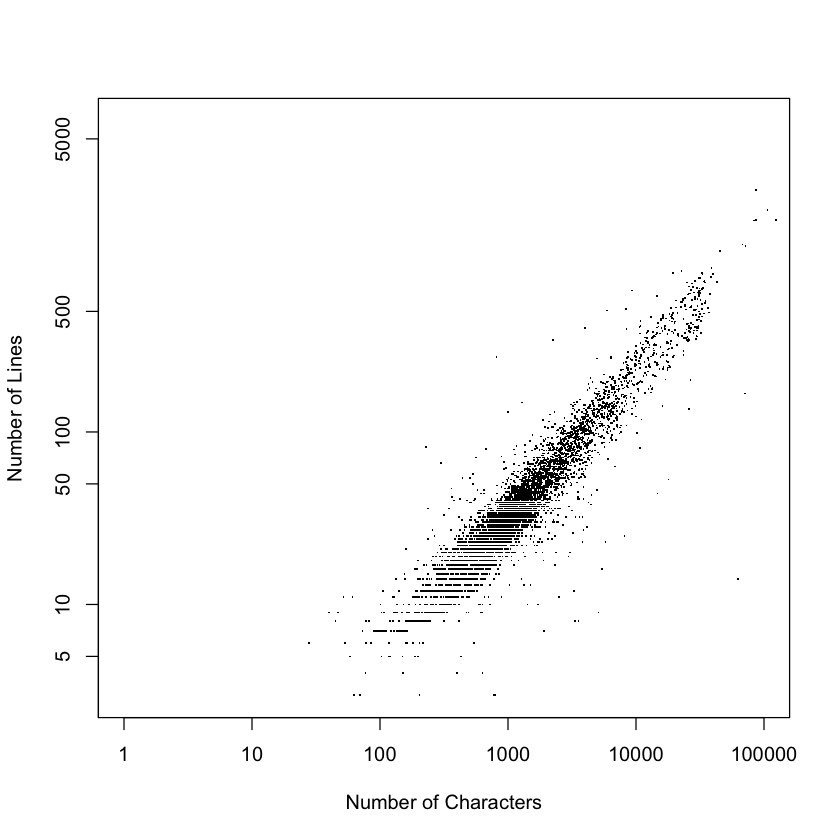

In [62]:
x.at = c(1,10,100,1000,10000,100000)
y.at = c(1, 5, 10, 50, 100, 500, 5000)
nL = 1 + emailDF$numLines
nC = 1 + emailDF$bodyCharCt

plot(nL ~ nC, log = "xy", pch=".", xlim=c(1,100000), axes = FALSE,
     xlab = "Number of Characters", ylab = "Number of Lines")
box() 
axis(1, at = x.at, labels = formatC(x.at, digits = 0, format="d"))
axis(2, at = y.at, labels = formatC(y.at, digits = 0, format="d")) 

From the above plot, it is evident that numbers of lines and Number of characters are positively correlated, which confirms that calcualtion of derived columns are correct.

### 5.5 Exploring the email Feature Set.

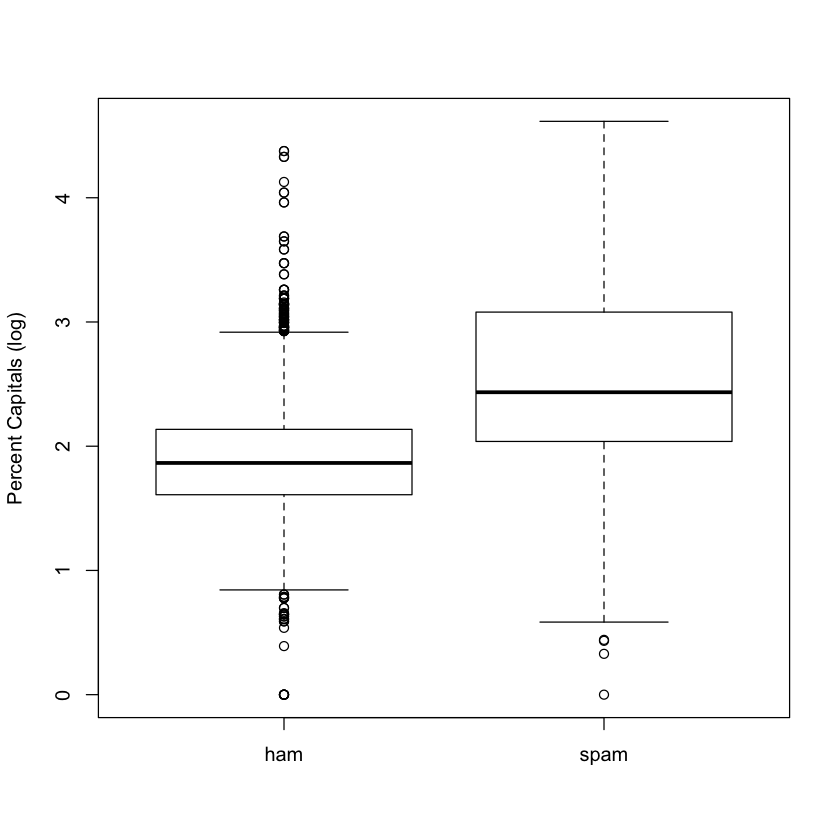

In [63]:
# Box plot of Percent log Capitals in Spam and Ham Messages.
percent = emailDF$perCaps
isSpamLabs = factor(emailDF$isSpam, labels = c("ham", "spam"))
boxplot(log(1 + percent) ~ isSpamLabs,
        ylab = "Percent Capitals (log)")

3/4 of spam messages have more capital letters than nearlly all of ham messages.

In [64]:
# Log of percentage of capitalization for Both Spam and Ham messages.
logPerCapsSpam = log(1 + emailDF$perCaps[ emailDF$isSpam ])
logPerCapsHam = log(1 + emailDF$perCaps[ !emailDF$isSpam ])

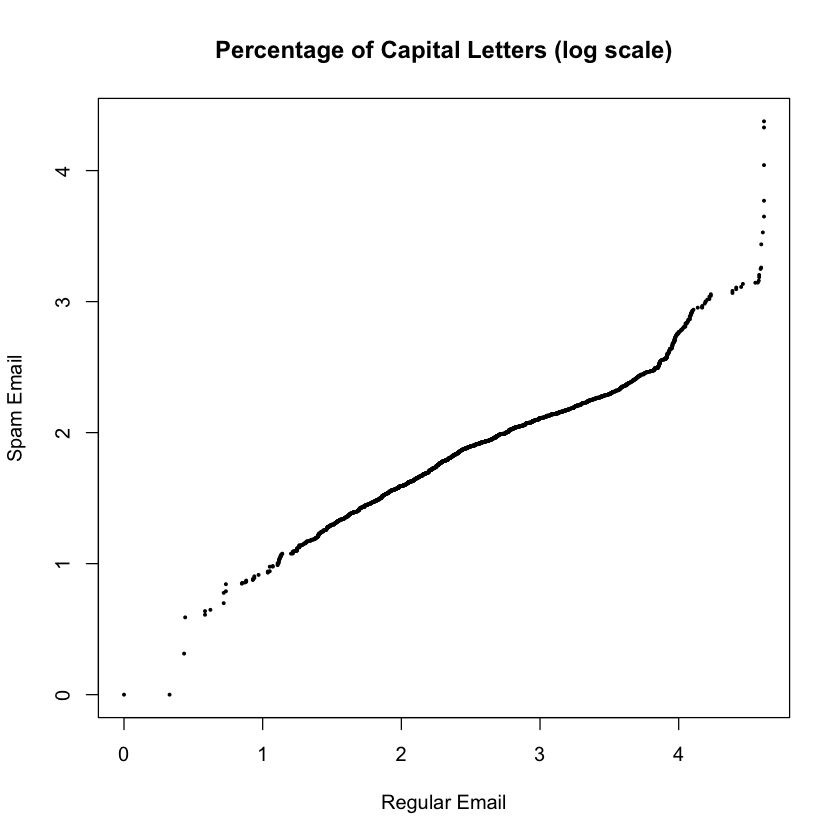

In [65]:
# QQ-Plot between Log of percentage of capitalization for Both Spam and Ham messages.
qqplot(logPerCapsSpam, logPerCapsHam, 
       xlab = "Regular Email", ylab = "Spam Email", 
       main = "Percentage of Capital Letters (log scale)",
       pch = 19, cex = 0.3)

Above plot shows that both distributions have nearly the same shape as it is a straight line.  

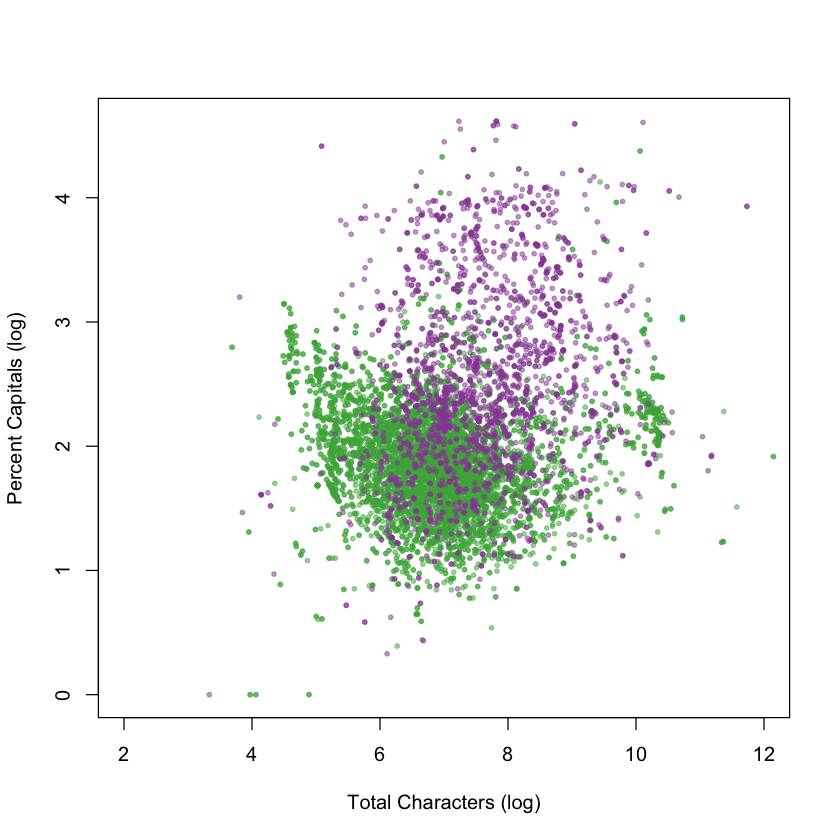

In [66]:
colI = c("#4DAF4A80", "#984EA380")
logBodyCharCt = log(1 + emailDF$bodyCharCt)
logPerCaps = log(1 + emailDF$perCaps)
plot(logPerCaps ~ logBodyCharCt, xlab = "Total Characters (log)",
     ylab = "Percent Capitals (log)",
     col = colI[1 + emailDF$isSpam],
     xlim = c(2,12), pch = 19, cex = 0.5)

Green dots indicate Ham Messages and purple dots indicate Spam Messages. From the above scatter plots, it is evident that Spam messages tend to have more capiatlizations.

In [67]:
#Number of Attachments
table(emailDF$numAtt, isSpamLabs)

    isSpamLabs
      ham spam
  0  6624 2158
  1   314  230
  2    11    6
  4     0    1
  5     1    2
  18    1    0

From above table, it is clear that Number of Attachments doesn't indicate whether message is Spam or Ham.

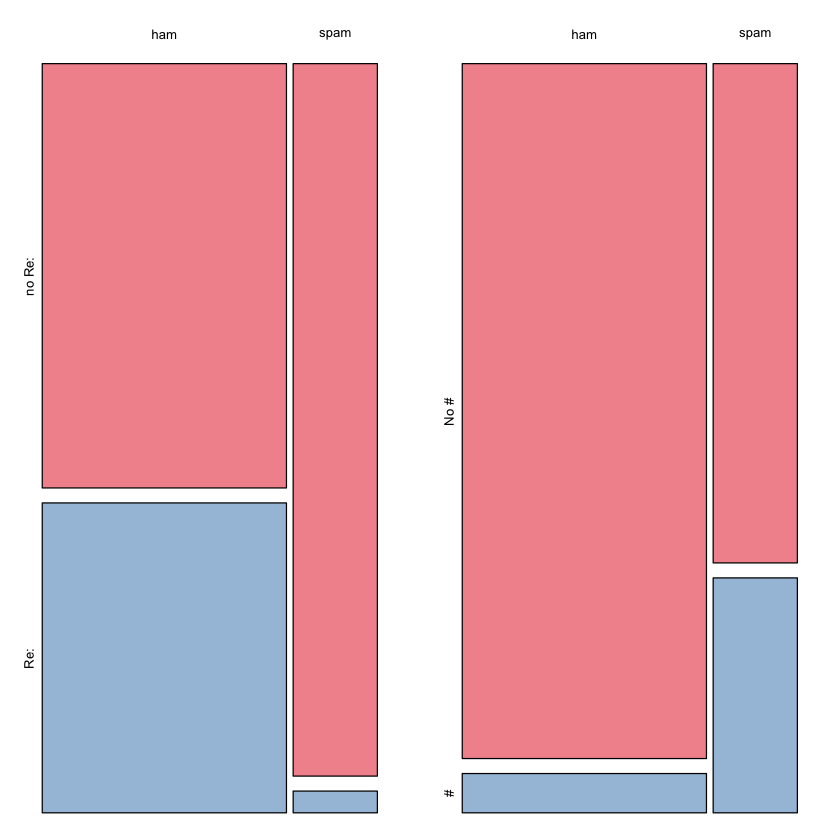

In [68]:
# Draw Mossaic Plot
oldPar = par(mfrow = c(1, 2), mar = c(1,1,1,1))

colM = c("#E41A1C80", "#377EB880")
isRe = factor(emailDF$isRe, labels = c("no Re:", "Re:"))
mosaicplot(table(isSpamLabs, isRe), main = "",
           xlab = "", ylab = "", color = colM)

fromNE = factor(emailDF$numEnd, labels = c("No #", "#"))
mosaicplot(table(isSpamLabs, fromNE), color = colM,
           main = "", xlab="", ylab = "")

par(oldPar)

From the above mossaic plots, we see that the spam messages are less likely to contain an Re: but more likely to have a numeric end to the sender’s address.

### 5.6 Fitting the rpart() Model to the email Data

In [69]:
# Library "rpart" for Recursive Partitioning for Classification
library(rpart)

# Function to Convert Logical Variables into Factors
setupRpart = function(data) {
  logicalVars = which(sapply(data, is.logical))
  facVars = lapply(data[ , logicalVars], 
                   function(x) {
                      x = as.factor(x)
                      levels(x) = c("F", "T")
                      x
                   })
  cbind(facVars, data[ , - logicalVars])
}

emailDFrp = setupRpart(emailDF)

In [70]:
numSpam=sum(emailDFrp$isSpam == "T")
numHam=sum(emailDFrp$isSpam == "F")

In [71]:
# Split between Train and Test Sets. Get Indices Here
set.seed(418910)
testSpamIdx = sample(numSpam, size = floor(numSpam/3))
testHamIdx = sample(numHam, size = floor(numHam/3))

In [72]:
# Get the Train and Test Datasets
testDF = 
  rbind( emailDFrp[ emailDFrp$isSpam == "T", ][testSpamIdx, ],
         emailDFrp[emailDFrp$isSpam == "F", ][testHamIdx, ] )
trainDF =
  rbind( emailDFrp[emailDFrp$isSpam == "T", ][-testSpamIdx, ], 
         emailDFrp[emailDFrp$isSpam == "F", ][-testHamIdx, ])

In [73]:
# Fit the Classification Tree
rpartFit = rpart(isSpam ~ ., data = trainDF, method = "class")

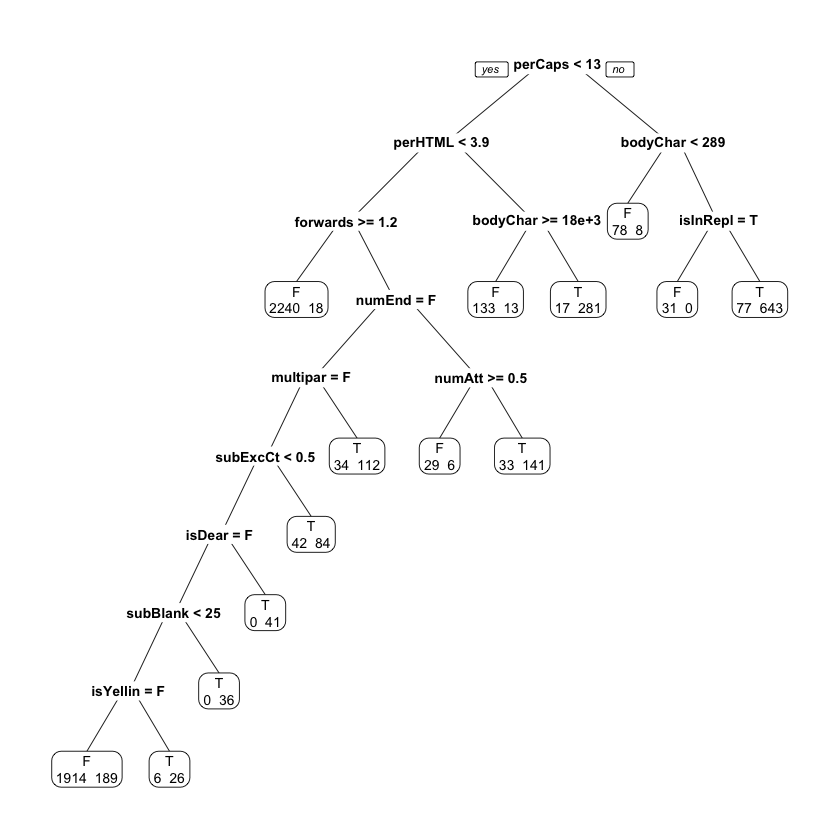

In [74]:
library(rpart.plot)
# Plot the Fitted Tree
prp(rpartFit, extra = 1)

In [75]:
# Prediction on the Test Data
predictions = predict(rpartFit, 
       newdata = testDF[, names(testDF) != "isSpam"],
       type = "class")
 
predsForHam = predictions[ testDF$isSpam == "F" ]
summary(predsForHam)

F    T 
2192  125

In [76]:
# Type -I Error Rate 

sum(predsForHam == "T") / length(predsForHam)

[1] 0.05394907

In [77]:
# Type - II Error Rate
predsForSpam = predictions[ testDF$isSpam == "T" ]
sum(predsForSpam == "F") / length(predsForSpam)

[1] 0.1564456

We see that our classifier did reasonably well with Type I errors, but the Type II error rate is 16%.

### 5.7 Model Parameters Tuning

In [78]:
args(rpart.control)

function (minsplit = 20L, minbucket = round(minsplit/3), cp = 0.01, 
    maxcompete = 4L, maxsurrogate = 5L, usesurrogate = 2L, xval = 10L, 
    surrogatestyle = 0L, maxdepth = 30L, ...) 
NULL

#### 5.7.1 Finding Optimal Value of Complexity Parameter "cp"

In [79]:
#List of Complexity Vals to try on
complexityVals = c(seq(0.00001, 0.0001, length=19),
                   seq(0.0001, 0.001, length=19), 
                   seq(0.001, 0.005, length=9),
                   seq(0.005, 0.01, length=9))

In [80]:
# Fits Various Models on different Complexity Valuues
fits = lapply(complexityVals, function(x) {
         rpartObj = rpart(isSpam ~ ., data = trainDF,
                          method="class", 
                          control = rpart.control(cp=x) )
           
         predict(rpartObj, 
                 newdata = testDF[ , names(testDF) != "isSpam"],
                 type = "class")
        })

In [81]:
spam = testDF$isSpam == "T"
numSpam = sum(spam)
numHam = sum(!spam)
errs = sapply(fits, function(preds) {
                      typeI = sum(preds[ !spam ] == "T") / numHam
                      typeII = sum(preds[ spam ] == "F") / numSpam
                      c(typeI = typeI, typeII = typeII)
                     })

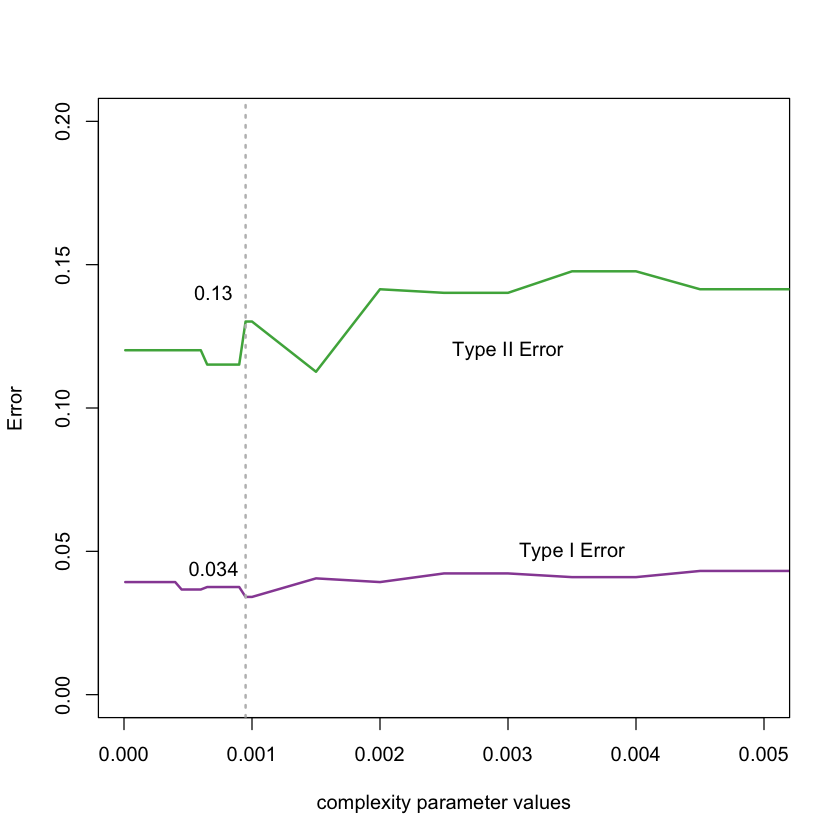

In [82]:
library(RColorBrewer)
cols = brewer.pal(9, "Set1")[c(3, 4, 5)]
plot(errs[1,] ~ complexityVals, type="l", col=cols[2], 
     lwd = 2, ylim = c(0,0.2), xlim = c(0,0.005), 
     ylab="Error", xlab="complexity parameter values")
points(errs[2,] ~ complexityVals, type="l", col=cols[1], lwd = 2)

text(x =c(0.003, 0.0035), y = c(0.12, 0.05), 
     labels=c("Type II Error", "Type I Error"))

minI = which(errs[1,] == min(errs[1,]))[1]
abline(v = complexityVals[minI], col ="grey", lty =3, lwd=2)

text(0.0007, errs[1, minI]+0.01, 
     formatC(errs[1, minI], digits = 2))
text(0.0007, errs[2, minI]+0.01, 
     formatC(errs[2, minI], digits = 3))

##### The best cp value is at 0.001, at which Type -1 Error is 3.4% and Type-II Error 13%.

#### 5.7.2 Finding Optimal Value of Complexity Parameter "minsplit" 

In [83]:
#List of Min Splits to try on
minsplitsVals = c(seq(10, 100, by = 10)  )

In [84]:
minsplitsVals

[1]  10  20  30  40  50  60  70  80  90 100

In [85]:
# Fits Various Models on different Min Splits Values
fits = lapply(minsplitsVals, function(x) {
         rpartObj = rpart(isSpam ~ ., data = trainDF,
                          method="class", 
                          control = rpart.control(minsplit=x) )
           
         predict(rpartObj, 
                 newdata = testDF[ , names(testDF) != "isSpam"],
                 type = "class")
        })

In [86]:
spam = testDF$isSpam == "T"
numSpam = sum(spam)
numHam = sum(!spam)
errs = sapply(fits, function(preds) {
                      typeI = sum(preds[ !spam ] == "T") / numHam
                      typeII = sum(preds[ spam ] == "F") / numSpam
                      c(typeI = typeI, typeII = typeII)
                     })

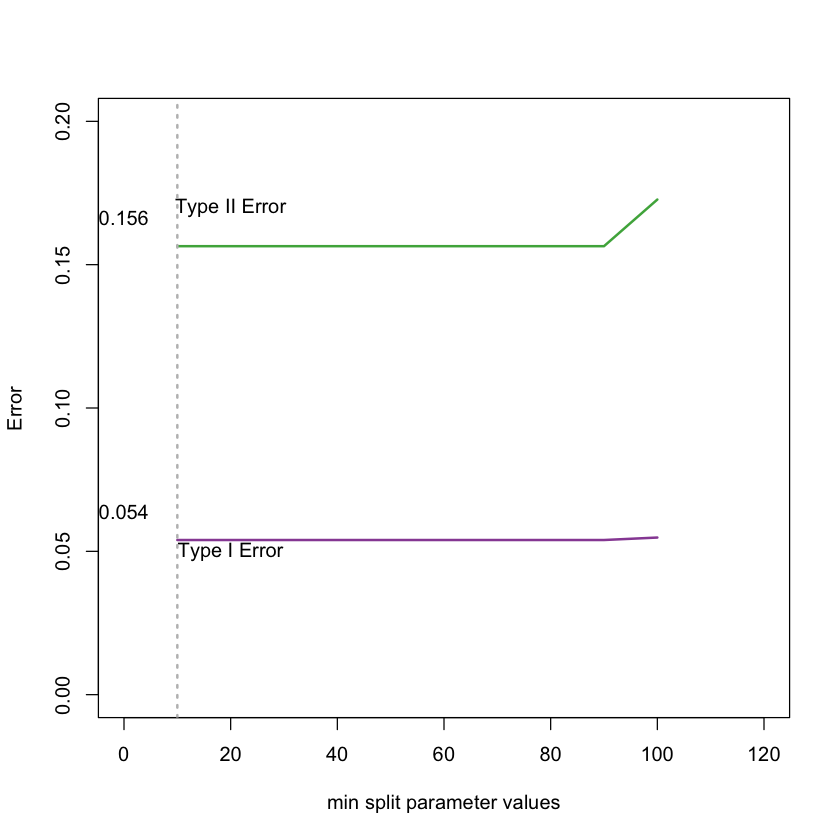

In [87]:
library(RColorBrewer)
cols = brewer.pal(9, "Set1")[c(3, 4, 5)]
plot(errs[1,] ~ minsplitsVals, type="l", col=cols[2], 
     lwd = 2, ylim = c(0,0.2), xlim = c(0,120), 
     ylab="Error", xlab="min split parameter values")
points(errs[2,] ~ minsplitsVals, type="l", col=cols[1], lwd = 2)

text(x =c(20, 20), y = c(0.17, 0.05), 
     labels=c("Type II Error", "Type I Error"))

minI = which(errs[1,] == min(errs[1,]))[1]
abline(v = minsplitsVals[minI], col ="grey", lty =3, lwd=2)

text(0.0007, errs[1, minI]+0.01, 
     formatC(errs[1, minI], digits = 2))
text(0.0007, errs[2, minI]+0.01, 
     formatC(errs[2, minI], digits = 3))

Type-I and Type-II Errors are constant with different Min Split Parameters values between 10 to 90.

## 6. Conclusion and Future Work
Recursive partitioning and classification trees alogorithm is found to be a very efficient algorithm for classifying emails into Spams and Hams. We have seen that complexity parameter (cp) at 0.001 results in the lowest Type-1 and Type-II error rate. Changing Min Split parameter values doesn't seem to significantly alter the overall type-I and type -II error rates. 

The model can be further tuned to find optimal values for minBucket, maxcompete, maxsurrogate, usesurrogate, surrogatestyle, maxdepth etc of model.

## 7. References

1. Lang, D. T., & Nolan, D. A. (2015). Data Science in R: A Case Studies Approach to Computational Reasoning and Problem Solving. CRC Press.
2. http://spamassassin.apache.org/